# Mini-Project: SVM & LR Classification
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

<span style="color: blue">Remove all blue text before submitting</span>

In [1]:
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, SelectKBest, chi2, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [2]:
verboseStatus = False

In [3]:
# Brett's directory
# Desktop
#%cd "C:\Sandbox\SMU\dataMining\ChoRepo\EducationDataNC\2017\Machine Learning Datasets"
# Laptop
# %cd "C:\sandbox\SMU\dataMining\choNotebook\EducationDataNC\2017\Machine Learning Datasets"

# Ryan's directory
#%cd "C:\Users\Clovis\Documents\7331DataMining\EducationDataNC\2017\Machine Learning Datasets"

# Cho's directory. Either uncomment the cd statement above or make your own cd.
#%cd "/Users/chostone/Documents/Data Mining/7331DataMining/EducationDataNC/2017/Machine Learning Datasets"

# NW directorY 
%cd C:\Users\Nicole Wittlin\Documents\Classes\MSDS7331\MiniLab"
dfPublicHS = pd.read_csv("PublicHighSchools2017_ML.csv")

print('********* Initial Values Before Cleaning *******************')
dfPublicHS.info(verbose = verboseStatus)

C:\Users\Nicole Wittlin\Documents\Classes\MSDS7331\MiniLab
********* Initial Values Before Cleaning *******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 403 entries, student_num to unit_code
dtypes: float64(322), int64(81)
memory usage: 1.4 MB


In [5]:
# Credit: https://www.kaggle.com/saravanann/santander
# Drop any columns that have zero variance
totalColNum = dfPublicHS.shape[1]
sel = VarianceThreshold()
sel.fit(dfPublicHS)

keepCols = sel.get_support(indices=True)
dfColIndex = np.arange(dfPublicHS.columns.size)
dropCol = np.delete(dfColIndex, keepCols)
dfPublicHS = dfPublicHS.drop(dfPublicHS.columns[dropCol], axis = 1)

In [6]:
# store all column names to a list
colNames = dfPublicHS.columns.tolist()

# Create correlation matrix
dfCorr = dfPublicHS[colNames].corr('pearson').abs()

# print correlation matrix
dfCorr

,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,...,SRC_Grades_Devices_Sent_Home_6:07:08,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10,SRC_Grades_Devices_Sent_Home_9:10:11,SRC_Grades_Devices_Sent_Home_9:10:11:12,SRC_Grades_Devices_Sent_Home_9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10:12,unit_code
student_num,1.000000,0.577813,0.158654,0.482427,0.545790,0.622973,0.602696,0.651012,0.542595,0.504443,...,0.006434,0.068748,0.050118,0.053001,0.038277,0.020877,0.044087,0.307002,0.040069,0.095413
lea_avg_student_num,0.577813,1.000000,0.266009,0.227217,0.256996,0.256629,0.241507,0.415685,0.292036,0.272326,...,0.059568,0.109862,0.081064,0.083629,0.018843,0.060824,0.172195,0.116165,0.064520,0.169113
st_avg_student_num,0.158654,0.266009,1.000000,0.133943,0.113514,0.185630,0.213359,0.229118,0.171302,0.115240,...,0.083580,0.373113,0.263549,0.009292,0.009292,0.026481,0.006265,0.058825,0.009292,0.063130
09_Size,0.482427,0.227217,0.133943,1.000000,0.712800,0.592155,0.554159,0.540738,0.477195,0.587350,...,0.001953,0.075839,0.009608,0.100266,0.031583,0.066520,0.023474,0.251240,0.015102,0.050861
10_Size,0.545790,0.256996,0.113514,0.712800,1.000000,0.633552,0.594540,0.594721,0.546398,0.479184,...,0.042601,0.081432,0.017624,0.017624,0.087442,0.019057,0.062975,0.294168,0.002324,0.033635
11_Size,0.622973,0.256629,0.185630,0.592155,0.633552,1.000000,0.790071,0.601437,0.514401,0.508646,...,0.041734,0.075168,0.089832,0.089832,0.016359,0.059943,0.078185,0.330737,0.000614,0.000788
12_Size,0.602696,0.241507,0.213359,0.554159,0.594540,0.790071,1.000000,0.548973,0.480256,0.486297,...,0.046796,0.071525,0.077970,0.077970,0.001879,0.046245,0.081762,0.402232,0.001879,0.050470
Biology_Size,0.651012,0.415685,0.229118,0.540738,0.594721,0.601437,0.548973,1.000000,0.728654,0.599181,...,0.025074,0.094739,0.050517,0.050517,0.025913,0.086837,0.022969,0.140187,0.017711,0.048523
English II_Size,0.542595,0.292036,0.171302,0.477195,0.546398,0.514401,0.480256,0.728654,1.000000,0.617556,...,0.041859,0.111418,0.066417,0.009095,0.009095,0.064511,0.038768,0.130433,0.033662,0.050935
Math I_Size,0.504443,0.272326,0.115240,0.587350,0.479184,0.508646,0.486297,0.599181,0.617556,1.000000,...,0.041099,0.088183,0.033329,0.016558,0.000071,0.015011,0.016565,0.146079,0.016700,0.005566


In [7]:
## source for code below: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/ ##

# Select upper triangle of correlation matrix
upper = dfCorr.where(np.triu(np.ones(dfCorr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.94
to_drop = [column for column in upper.columns if any(upper[column] > 0.94)]
to_drop
print (len(to_drop))

11


In [8]:
# code to determine the number of highly correlated variables to drop for given r.
r = .95
while (r >= .80):
    to_drop = [column for column in upper.columns if any(upper[column] > r)]
    print('For r of ', r, 'drop # is:', len(to_drop) )
    r = r-.01
    r = round(r,2)
# print the list of columns to drop for the last iteration of the while loop.    
to_drop

For r of  0.95 drop # is: 0
For r of  0.94 drop # is: 11
For r of  0.93 drop # is: 22
For r of  0.92 drop # is: 28
For r of  0.91 drop # is: 34
For r of  0.9 drop # is: 42
For r of  0.89 drop # is: 51
For r of  0.88 drop # is: 58
For r of  0.87 drop # is: 66
For r of  0.86 drop # is: 72
For r of  0.85 drop # is: 80
For r of  0.84 drop # is: 88
For r of  0.83 drop # is: 99
For r of  0.82 drop # is: 107
For r of  0.81 drop # is: 116
For r of  0.8 drop # is: 124


['lea_state_perpupil_num',
 '4-Year Cohort Graduation Rate Score',
 'ACTMath_ACTBenchmark_All',
 'ACTScience_ACTBenchmark_All',
 'ACTWorkKeys_SilverPlus_All',
 'ACTWriting_ACTBenchmark_All',
 'EOCSubjects_CACR_All',
 'ACTCompositeScore_UNCMin_Female',
 'ACTEnglish_ACTBenchmark_Female',
 'ACTMath_ACTBenchmark_Female',
 'ACTReading_ACTBenchmark_Female',
 'ACTScience_ACTBenchmark_Female',
 'ACTWorkKeys_SilverPlus_Female',
 'EOCBiology_CACR_Female',
 'EOCEnglish2_CACR_Female',
 'GraduationRate_5yr_Female',
 'ACTCompositeScore_UNCMin_Male',
 'ACTMath_ACTBenchmark_Male',
 'ACTScience_ACTBenchmark_Male',
 'ACTWorkKeys_SilverPlus_Male',
 'ACTWriting_ACTBenchmark_Male',
 'EOCBiology_CACR_Male',
 'EOCEnglish2_CACR_Male',
 'EOCMathI_CACR_Male',
 'ACTMath_ACTBenchmark_AmericanIndian',
 'ACTWorkKeys_SilverPlus_AmericanIndian',
 'ACTWriting_ACTBenchmark_AmericanIndian',
 'EOCBiology_CACR_AmericanIndian',
 'EOCEnglish2_CACR_AmericanIndian',
 'EOCMathI_CACR_AmericanIndian',
 'GraduationRate_4yr_Americ

In [9]:
dfDropped = dfPublicHS.drop(to_drop, axis = 1)

In [10]:
dfDropped.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 278 columns):
student_num                                              float64
lea_avg_student_num                                      float64
st_avg_student_num                                       float64
09_Size                                                  float64
10_Size                                                  float64
11_Size                                                  float64
12_Size                                                  float64
Biology_Size                                             float64
English II_Size                                          float64
Math I_Size                                              float64
lea_total_expense_num                                    float64
lea_salary_expense_pct                                   float64
lea_services_expense_pct                                 float64
lea_supplies_expense_pct                         

## Data Reduction / Prep

In [11]:
# Source: https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    
def getTopCoefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    feature_names = np.array(feature_names)
    return feature_names[top_coefficients]

# Source: https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def percentile_threshold_selector(data, percent=10):
    selector = SelectPercentile(f_classif, percentile = percent)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

def scale_data(data):
    scaler = StandardScaler()
    temp = scaler.fit_transform(data)
    data = pd.DataFrame(temp, columns = data.columns)
    return data

In [12]:
param_grid = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']} ]
cls = GridSearchCV(SVC(), param_grid, cv=10)

In [13]:
# Evenly split our target variable (predict whether a school will have 52% postsecondary enrollment)
splitLimit = 52
dfDropped['schoolPctTarget'] = np.where(dfDropped['ALL_All Students (Total or Subtotal_ENROLL_sch_pct'] >= splitLimit, 1, 0)
print("{} of {}: {}%".format(dfDropped['schoolPctTarget'].sum(), dfDropped.shape[0], 
                             round(dfDropped['schoolPctTarget'].sum()/dfDropped.shape[0] * 100,2)))

239 of 470: 50.85%


In [14]:
# Credit: https://stackoverflow.com/questions/19758364/rename-a-single-column-header-in-a-pandas-dataframe
# Credit: https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
# Credit: https://stackoverflow.com/questions/39741429/pandas-replace-a-character-in-all-column-names
# Credit: https://stackoverflow.com/questions/33157643/pandas-replace-erase-different-characters-from-strings

# Drop these columns because they contain the answer we are trying to predict
dropCols = dfDropped.filter(regex = r'sch_pct|college')

# These names seem to cause problems so let's give them friendlier names
renameCols = {'_1yr_tchr_trnovr_pct': 'One_yr_tchr_trnovr_pct',
              '0-3 Years_LEA_Exp_Pct_Prin': 'less_3_years_LEA_Exp_Pct_Prin',
              '10+ Years_LEA_Exp_Pct_Prin': 'ten_plus_years_LEA_Exp_Pct_Prin',
              '4-10 Years_LEA_Exp_Pct_Prin': 'four_plus_years_LEA_Exp_Pct_Prin',
              '4-Year_Cohort_Graduation_Rate_Score': 'four_Year_Cohort_Graduation_Rate_Score',
              '_1_to_1_access_Yes': 'one_to_one_access_yes'}

# Drop columns
dfDropped.drop(dropCols, axis = 1, inplace = True)

# Remove any trailing white spaces
dfDropped.columns = dfDropped.columns.str.strip()

# Remove any spaces, slashes, or hyphens
dfDropped.columns = dfDropped.columns.str.replace(r' |/|-', "_")

# Rename columns
dfDropped.rename(columns=renameCols, inplace = True)

In [15]:
# Credit: https://www.kaggle.com/saravanann/santander

# Normalize data
maxCols = dfDropped.shape[1]
X = scale_data(dfDropped.iloc[:,0:maxCols-2])

# Set target
y = dfDropped['schoolPctTarget']

In [16]:
# Choose the top 10% attributes based on ANOVA score
sel = SelectPercentile(f_classif, percentile = 10)
sel.fit(X, y)

# Credit: https://www.kaggle.com/saravanann/santander
# Convert back to dataframe

keepCols = sel.get_support(indices=True)
temp = sel.transform(X)
X = pd.DataFrame(temp, columns = X.columns[keepCols])

C:\Users\Nicole Wittlin\Anaconda3\envs\dataminingintro\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [17]:
dfDropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 273 entries, student_num to schoolPctTarget
dtypes: float64(200), int32(1), int64(72)
memory usage: 1000.7 KB


## Logistic Regresion, using data set reduced by feature selection

In [18]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'schoolPctTarget' in dfDropped:
    y = dfDropped['schoolPctTarget'].values # get the labels we want
    del dfDropped['schoolPctTarget'] # get rid of the class label
    X = dfDropped.values # use everything else to predict!

## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
#    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [19]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.6702127659574468
confusion matrix
 [[27 14]
 [17 36]]
====Iteration 1  ====
accuracy 0.648936170212766
confusion matrix
 [[32 19]
 [14 29]]
====Iteration 2  ====
accuracy 0.574468085106383
confusion matrix
 [[31 21]
 [19 23]]


In [20]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.68085106 0.56382979 0.58510638]


In [21]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

## Interpret Weights

In [22]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight=None) # get object
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dfDropped.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.6382978723404256
[[33 19]
 [15 27]]
lea_advance_dgr_pct has weight of -1.1343431557392234
PacificIslandFemalePct has weight of -1.0230939168385373
ACTCompositeScore_UNCMin_Black has weight of -1.0106505756854456
lea_wap_num has weight of -0.9478253057370537
EOCBiology_CACR_EDS has weight of -0.9245164385206006
HispanicFemalePct has weight of -0.8442167997075094
09_Size has weight of -0.7714352818647294
books_per_student has weight of -0.7634343222608106
EOCEnglish2_CACR_Black has weight of -0.7312744668504313
GraduationRate_5yr_EDS has weight of -0.7036772968885773
EOCSubjects_CACR_AIG has weight of -0.7023498651222969
EOCEnglish2_CACR_White has weight of -0.6941978500056991
AsianFemalePct has weight of -0.688956936555756
GraduationRate_4yr_SWD has weight of -0.6581847562976846
GraduationRate_4yr_AIG has weight of -0.6529279185293805
lea_flicensed_teach_pct has weight of -0.6406304800077072
Accomplished_TCHR_Standard_5_Pct has weight of -0.6354441341611566
lea_supplies_expe

EOCSubjects_CACR_Asian has weight of 0.5383448766215778
lea_expelled_per_c_num has weight of 0.5415150415570872
EOCBiology_CACR_Asian has weight of 0.5460745614798764
Biology_Score has weight of 0.5600789906360198
ACTWorkKeys_SilverPlus_Black has weight of 0.5740109141465364
ACTWorkKeys_SilverPlus_AIG has weight of 0.5826898839678392
sat_avg_score_num has weight of 0.5952864782658773
One_yr_tchr_trnovr_pct has weight of 0.6090940351158793
lea_short_susp_per_c_num has weight of 0.6169116404331901
ACTCompositeScore_UNCMin_Hispanic has weight of 0.6193736734424746
lea_salary_expense_pct has weight of 0.6235877296432292
EOCBiology_CACR_AIG has weight of 0.62735446997187
GraduationRate_5yr_All has weight of 0.6465891021626787
GraduationRate_5yr_LEP has weight of 0.6491633807150624
Accomplished_TCHR_Standard_2_Pct has weight of 0.6564312007691231
ACT_Score has weight of 0.6764764412447081
lea_stud_internet_comp_num has weight of 0.6828823810366385
ACTCompositeScore_UNCMin_LEP has weight of 0

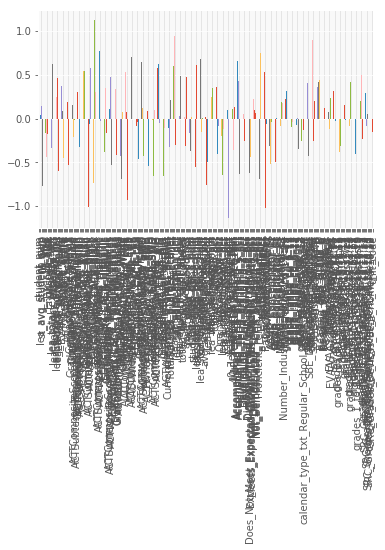

In [24]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=dfDropped.columns)
weights.plot(kind='bar')
plt.show()

## Create Models (50 points)
<span style="color: blue">Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). <b>Adjust parameters of the models to make them more accurate.</b> If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.

## Model Advantages (10 points)
<span style="color: blue">Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.</span>

## Interpret Feature Importance (30 points)

<span style="color: blue">Use the weights from logistic regression to interpret the importance of different features for the classification task. <b>Explain your interpretation in detail.</b>Why do you think some variables are more important?

## Interpret Support Vectors (10 points)
<span style="color:blue">Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.